# DATA305/475 - Lecture 1: Introduction to Artificial Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris(as_frame=True)
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [5]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

## Perceptron

In [6]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [7]:
X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

In [8]:
y_pred

array([ True, False])

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

In [10]:
X_new[0][0]

2

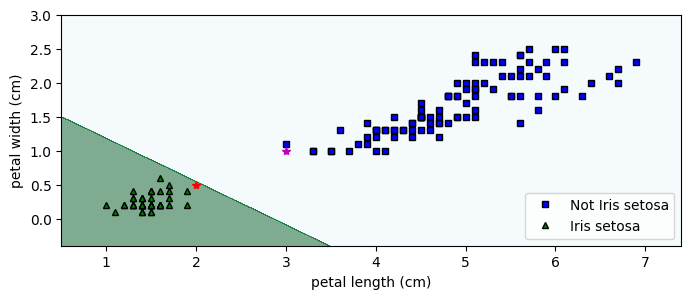

In [11]:
fig = plt.figure(figsize=(8, 3))
disp = DecisionBoundaryDisplay.from_estimator(per_clf, X, grid_resolution=1000, eps=0.5, 
                                              plot_method="contourf", response_method="predict",
                                              xlabel="petal length (cm)", ylabel="petal width (cm)", 
                                              alpha=0.5, cmap=plt.cm.BuGn, ax=plt.gca())
disp.ax_.plot(X[y==0, 0], X[y==0, 1], "bs", markersize=4, markeredgecolor='black', label="Not Iris setosa")
disp.ax_.plot(X[y==1, 0], X[y==1, 1], "g^", markersize=4, markeredgecolor='black', label="Iris setosa")
disp.ax_.plot(X_new[0][0], X_new[0][1], "r*")
disp.ax_.plot(X_new[1][0], X_new[1][1], "m*")
disp.ax_.legend(loc="lower right")
fig.savefig("perceptron_iris_contour.pdf", bbox_inches="tight")

When the Perceptron identifies a decision boundary that successfully separates the classes, it stops further learning. As a result, the decision boundary tends to be positioned relatively close to one of the classes.

The `Perceptron` is functionally equivalent to an `SGDClassifier` configured with `loss="perceptron"`, no regularization, and a fixed learning rate set to 1.

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="perceptron", penalty=None,
                        learning_rate="constant", eta0=1, random_state=42)
sgd_clf.fit(X, y)

assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == per_clf.intercept_).all()

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

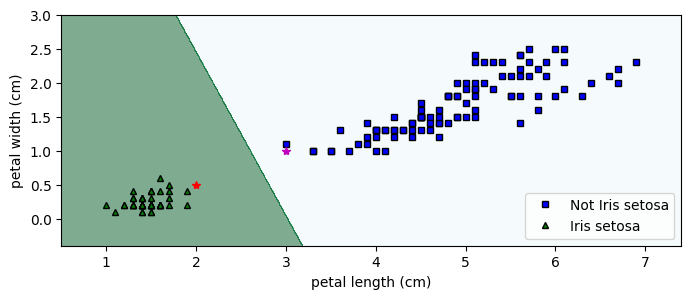

In [14]:
fig = plt.figure(figsize=(8, 3))
disp = DecisionBoundaryDisplay.from_estimator(log_reg, X, grid_resolution=1000, eps=0.5, 
                                              plot_method="contourf", response_method="predict",
                                              xlabel="petal length (cm)", ylabel="petal width (cm)", 
                                              alpha=0.5, cmap=plt.cm.BuGn, ax=plt.gca())
disp.ax_.plot(X[y==0, 0], X[y==0, 1], "bs", markersize=4, markeredgecolor='black', label="Not Iris setosa")
disp.ax_.plot(X[y==1, 0], X[y==1, 1], "g^", markersize=4, markeredgecolor='black', label="Iris setosa")
disp.ax_.plot(X_new[0][0], X_new[0][1], "r*")
disp.ax_.plot(X_new[1][0], X_new[1][1], "m*")
disp.ax_.legend(loc="lower right")

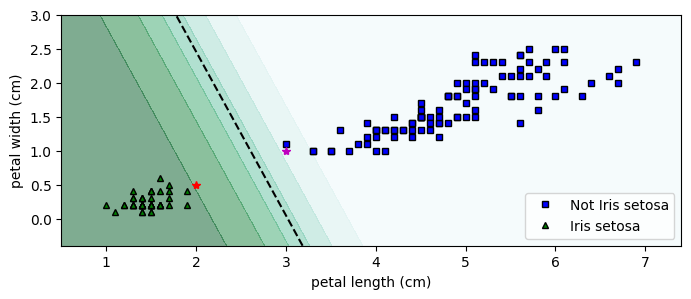

In [15]:
fig = plt.figure(figsize=(8, 3))
disp = DecisionBoundaryDisplay.from_estimator(log_reg, X, grid_resolution=1000, eps=0.5, 
                                              plot_method="contourf", response_method="predict_proba",
                                              xlabel="petal length (cm)", ylabel="petal width (cm)", 
                                              alpha=0.5, cmap=plt.cm.BuGn, ax=plt.gca())

# Add the decision boundary at probability = 0.5
contour = DecisionBoundaryDisplay.from_estimator(log_reg, X, grid_resolution=1000, eps=0.5,
                                                 plot_method="contour", response_method="predict_proba",
                                                 levels=[0.5], colors="black", linestyles="dashed",
                                                 ax=plt.gca())

disp.ax_.plot(X[y==0, 0], X[y==0, 1], "bs", markersize=4, markeredgecolor='black', label="Not Iris setosa")
disp.ax_.plot(X[y==1, 0], X[y==1, 1], "g^", markersize=4, markeredgecolor='black', label="Iris setosa")
disp.ax_.plot(X_new[0][0], X_new[0][1], "r*")
disp.ax_.plot(X_new[1][0], X_new[1][1], "m*")
disp.ax_.legend(loc="lower right")
fig.savefig("lr_iris_contour.pdf", bbox_inches="tight")

In [16]:
log_reg.predict(X_new)

array([ True, False])

In [17]:
log_reg.predict_proba(X_new)[:,1]

array([0.89156441, 0.26404017])

## Activation functions

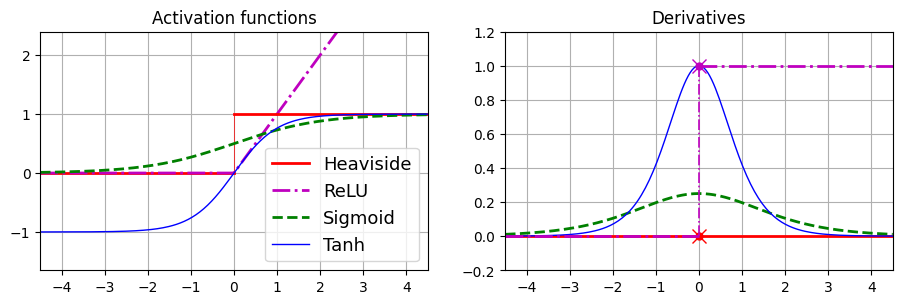

In [18]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

fig = plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

fig.savefig("activation_functions.pdf", bbox_inches="tight")
plt.show()

## MLPRegressor

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

In [20]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [21]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [22]:
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [23]:
rmse

0.5053326657968172

In [24]:
root_mean_squared_error(pipeline.predict(X_test), y_test)

0.5211279195578373

## MLPClassifier

In [25]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [26]:
iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

In [27]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=[5], max_iter=10000,
                               random_state=42))])

In [28]:
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

In [29]:
pipeline.score(X_test, y_test)

1.0